## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
df = pd.read_csv('QueryResults.csv', header=0, names=['DATE', 'TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
print(df.head())
df.tail()

                  DATE         TAG  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    163
3  2008-08-01 00:00:00           c     84
4  2008-08-01 00:00:00      python    124


,DATE,TAG,POSTS
2155,2021-07-01 00:00:00,r,4714
2156,2021-07-01 00:00:00,ruby,503
2157,2021-07-01 00:00:00,javascript,17633
2158,2021-07-01 00:00:00,swift,2301
2159,2021-07-01 00:00:00,python,24532


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
df.shape

(2160, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()

DATE     2160
TAG      2160
POSTS    2160
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df.groupby('TAG').sum()


,POSTS
TAG,
assembly,38252
c,362040
c#,1488535
c++,731697
delphi,48318
go,54921
java,1786773
javascript,2244871
perl,65724


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,156,156
c,156,156
c#,157,157
c++,156,156
delphi,156,156
go,141,141
java,156,156
javascript,156,156
perl,156,156


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
print(df['DATE'][1])
df.DATE[1]

2008-08-01 00:00:00


'2008-08-01 00:00:00'

In [ ]:
type(df['DATE'][1])

str

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,163
3,2008-08-01,c,84
4,2008-08-01,python,124


## Data Manipulation



In [ ]:
pivoted_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
pivoted_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,84.0,508.0,164.0,14.0,NaN,222.0,163.0,28.0,160.0,124.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,540.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1989.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,503.0,452.0,1.0,159.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,340.0,2662.0,7337.0,4737.0,270.0,827.0,10456.0,19853.0,154.0,5597.0,28228.0,6089.0,569.0,2911.0
2021-04-01,345.0,2464.0,6782.0,4356.0,186.0,686.0,9534.0,18715.0,143.0,5133.0,26600.0,5621.0,606.0,2534.0
2021-05-01,326.0,2268.0,6588.0,4611.0,179.0,701.0,9729.0,18519.0,123.0,5111.0,26169.0,5409.0,448.0,2217.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
pivoted_df.shape

(157, 14)

In [ ]:
pivoted_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [ ]:
pivoted_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,84.0,508.0,164.0,14.0,NaN,222.0,163.0,28.0,160.0,124.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,540.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1989.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,503.0,452.0,1.0,159.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [ ]:
pivoted_df.count()

TAG
assembly      156
c             156
c#            157
c++           156
delphi        156
go            141
java          156
javascript    156
perl          156
php           156
python        156
r             154
ruby          156
swift         148
dtype: int64

In [ ]:
pivoted_df.fillna(0, inplace=True)

In [ ]:
pivoted_df.isna()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-08-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-09-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-10-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-11-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-04-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-05-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

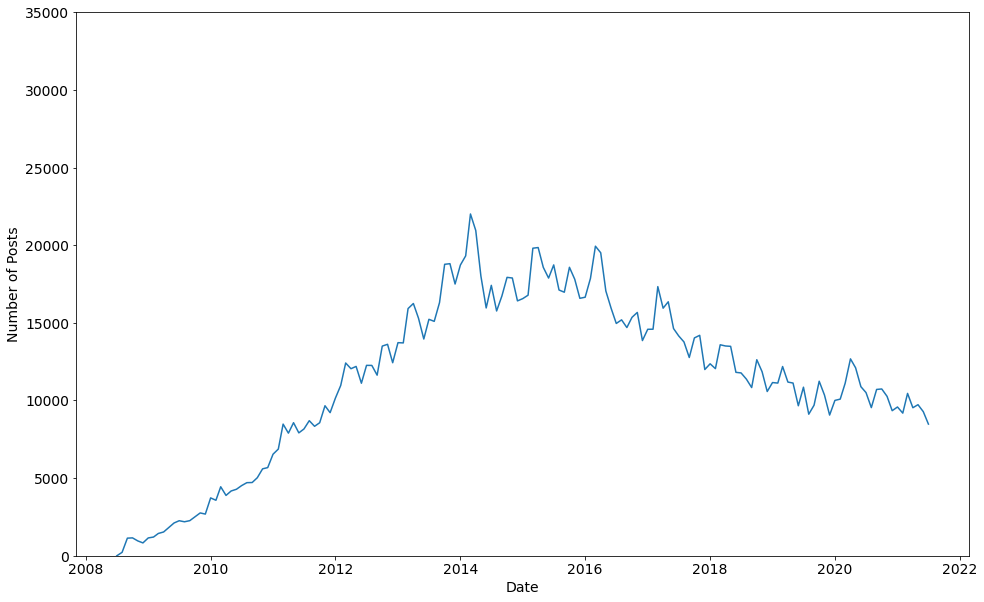

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(pivoted_df.index, pivoted_df['java'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

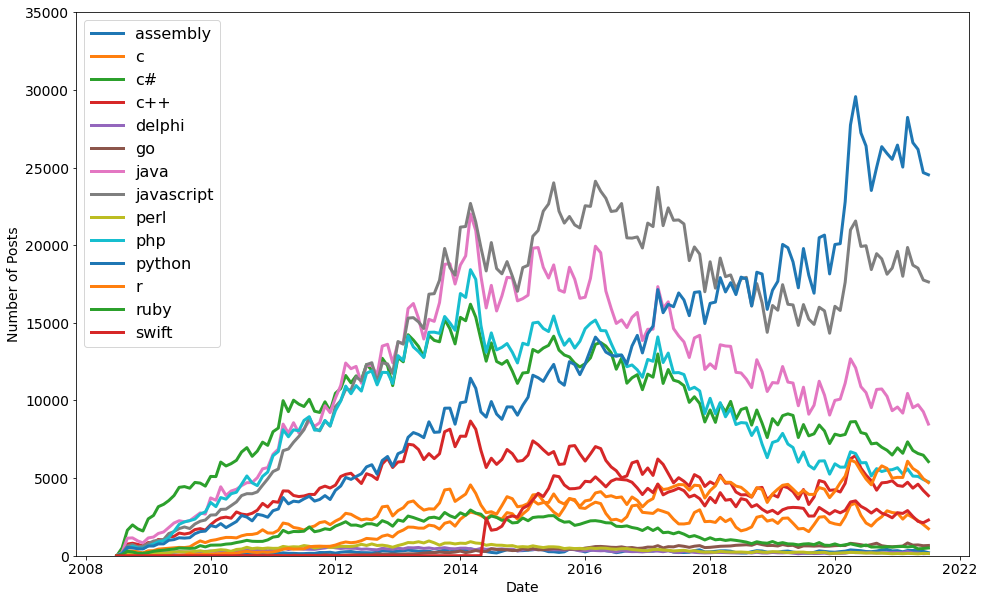

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in pivoted_df.columns:
  plt.plot(pivoted_df.index, pivoted_df[column], linewidth=3, label=pivoted_df[column].name)

plt.legend(fontsize=16)


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [ ]:
roll_df = pivoted_df.rolling(window=12).mean()

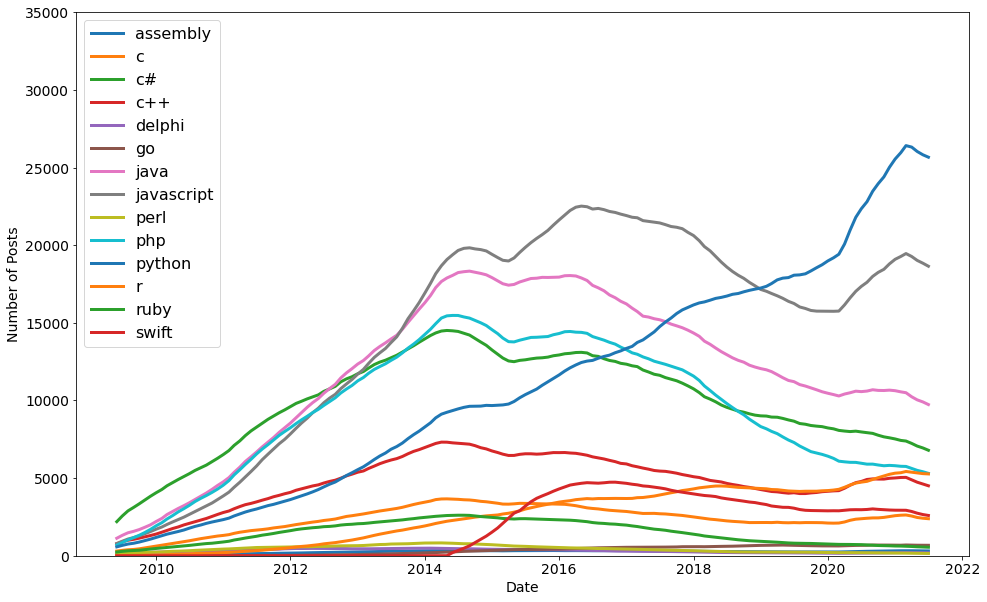

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)
